**Model 2: Phân nhóm khách hàng với hai thuộc tính bằng K-Means sau đó dùng Naive Bayes xây dựng mô hình dự đoán lớp cho khách hàng**

- Dùng K-Means phân nhóm khách hàng

In [ ]:
#Kết nối với Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Tạo dataset từ file csv
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DS102_CK/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#Tiền xử lý dữ liệu
df=df.drop(['CustomerID', 
            'Gender', 
            'Age'],axis=1)

In [ ]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
#import thư viện
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px

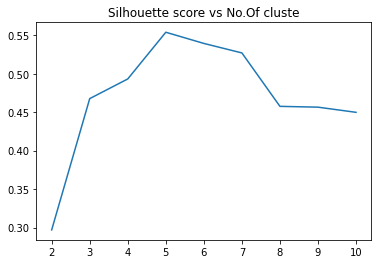

In [ ]:
#Tìm K phù hợp cho thuật toán K-mean
from sklearn.metrics import silhouette_score
sil_score=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df)
  preds = kmeans.predict(df)
  score = silhouette_score(df, preds, metric='euclidean')
  sil_score.append(score)
plt.plot(range(2,11),sil_score)
plt.title("Silhouette score vs No.Of cluste")
plt.show()

In [ ]:
#Huấn luyện mô hình
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
kmeans.fit(df)
df['label']=kmeans.labels_
y_kmeans= kmeans.fit_predict(df)

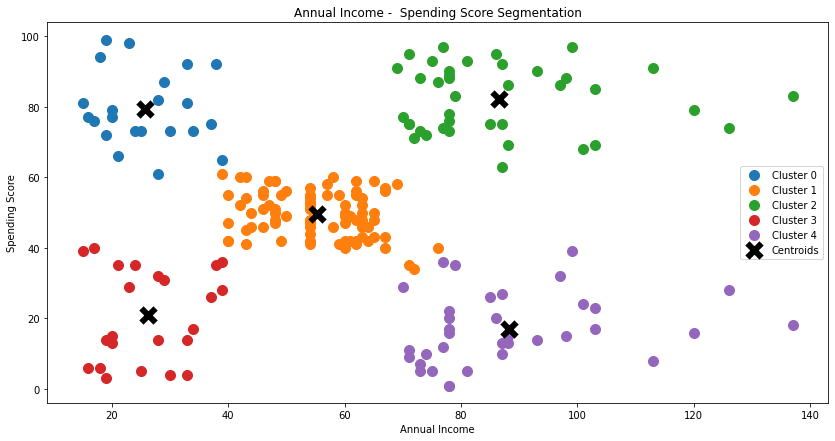

In [ ]:
#Trực quan hóa các điểm dữ liệu trong 5 cụm
plt.figure(figsize=(14,7))
plt.title('Annual Income -  Spending Score Segmentation')
plt.xlabel('Annual Income') 
plt.ylabel('Spending Score')
colors=['C0','C1','C2','C3','C4']
for i in range(len(np.unique(y_kmeans))):
    plt.scatter(df.loc[y_kmeans == i, 'Annual Income (k$)'], 
                df.loc[y_kmeans == i, 'Spending Score (1-100)'], 
                s = 100, c=colors[i], label = 'Cluster {}'.format(i))
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s = 200, marker='x', c = 'black', linewidth=6, label = 'Centroids')

plt.legend()
plt.show()

In [ ]:
#Thống kê các điểm dữ liệu trong 5 cụm
df.groupby('label').size().reset_index()

,label,0
0,0,22
1,1,81
2,2,39
3,3,23
4,4,35


In [ ]:
#Trực quan hóa sự phân bố các điểm dữ liệu vào 5 cụm
pie=df.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color='label')

*   Dùng Naive Bayes xây dựng mô hình dự đoán lớp cho khách hàng



In [ ]:
#Import các thư viện
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
df

,Annual Income (k$),Spending Score (1-100),label
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,4
197,126,74,2
198,137,18,4


In [ ]:
#Chia thành tập train test theo tỉ lệ 8:2
X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, 
                                                    random_state = 42)

In [ ]:
#Huấn luyện mô hình
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 114.81999999999996, 'Predicted')

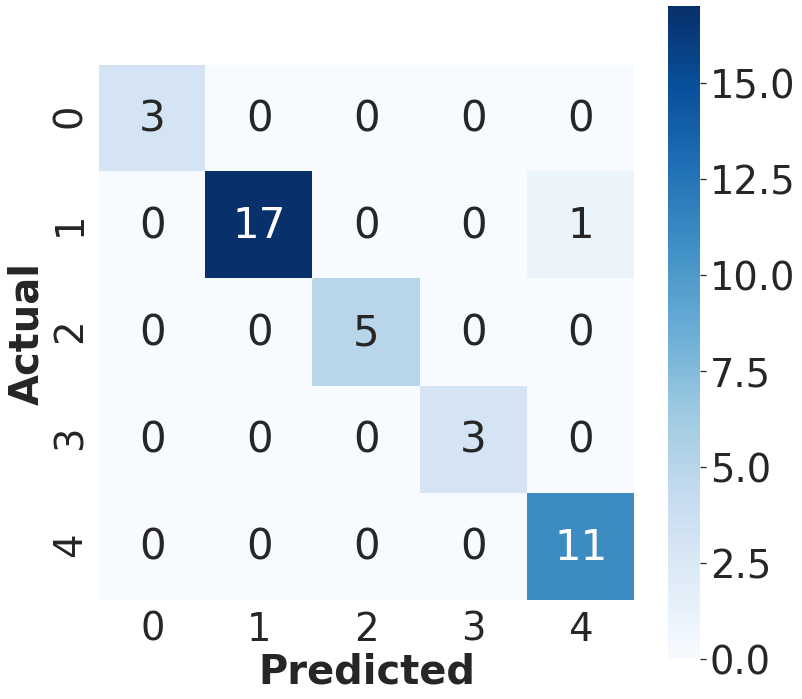

In [ ]:
#In ra confusion matrix
cm = confusion_matrix(Y_test, GNB_classifier.predict(X_test))
plt.figure(figsize=(12, 12))
sns.set(font_scale=3.5)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'g')
ax.set_ylabel('Actual', fontsize=40 ,fontweight = 'bold')
ax.set_xlabel('Predicted', fontsize=40, fontweight = 'bold')

In [ ]:
#Classification report
print(classification_report(Y_test, GNB_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.98      0.99      0.99        40
weighted avg       0.98      0.97      0.98        40



**---Predict một điểm dữ liệu---**

In [ ]:
#@title Nhập các thuộc tính khách hàng { run: "auto" }
Annual_Income =  15#@param {type:"integer"}
Spending_Score =  81#@param {type:"integer"}


obj=np.array([Annual_Income, Spending_Score])


Message = 'Cluster ' + str(GNB_classifier.predict(obj.reshape(1, -1))[0])

#button 'Predict'
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Predict")
output = widgets.Output()

def on_button_clicked(b):
  with output:
    print(Message)

button.on_click(on_button_clicked)
display(button, output)

Button(description='Predict', style=ButtonStyle())

Output()